In [33]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_auc_score, recall_score, precision_score

# models
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [60]:
data=pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Group
0,-0.604285,-0.610629,0.026014,0.019710,0.406532,0.678796,0.524360,0.404739,B
1,-0.111772,-1.125178,0.744157,0.078315,0.088176,0.891009,0.018460,0.536511,B
2,-0.916802,1.965494,0.150022,0.388770,0.179276,0.064449,0.159279,0.951204,B
3,-0.280479,0.920669,0.208949,0.940153,0.854437,0.688172,0.365126,0.985259,A
4,1.856025,1.043214,0.167088,0.207002,0.979049,0.641019,0.628764,0.045912,B


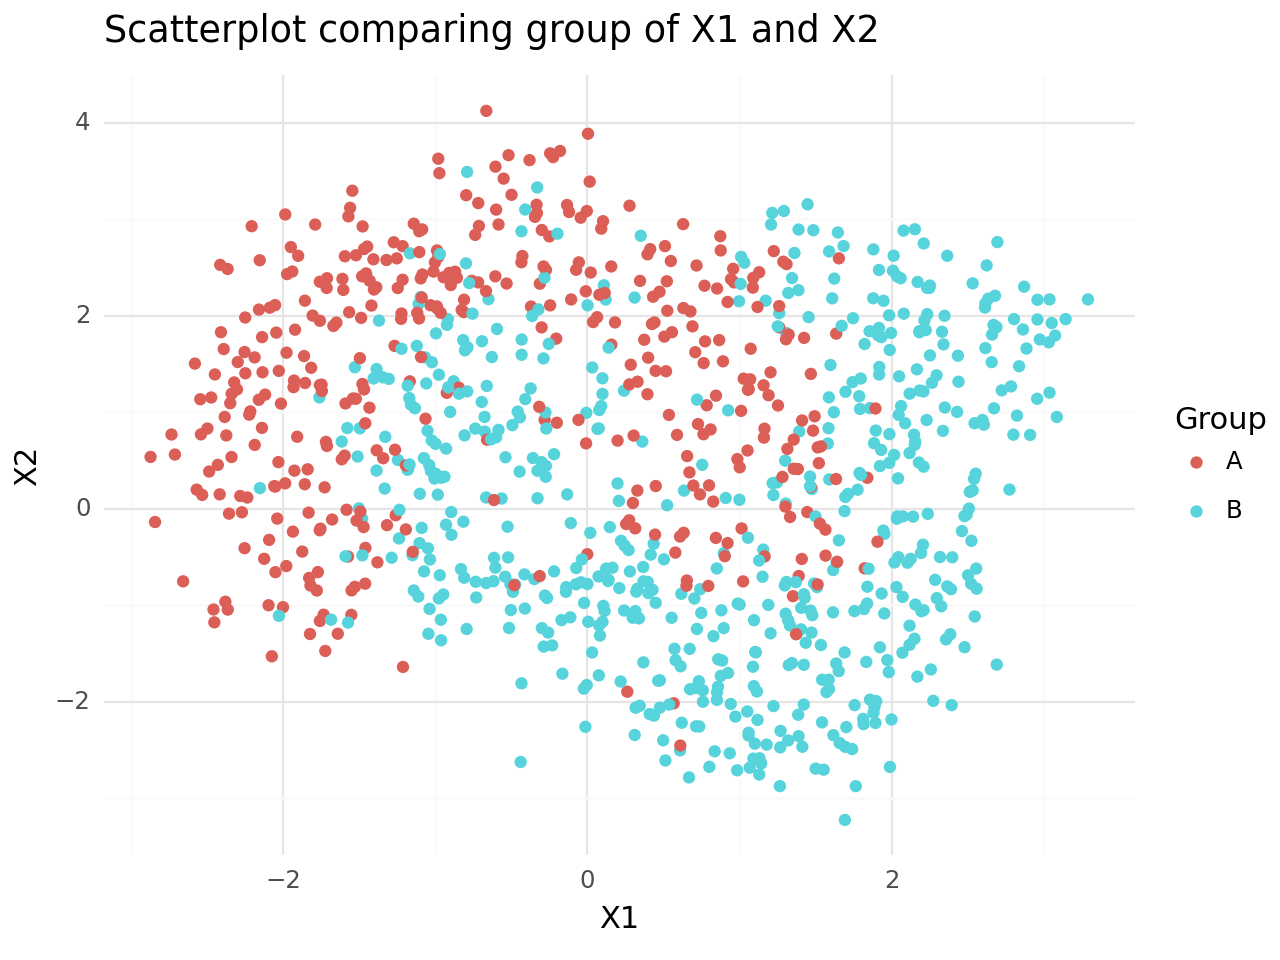

<Figure Size: (640 x 480)>

In [36]:
ggplot(data, aes(x = 'X1', y = 'X2', color = 'Group'))+geom_point()+theme_minimal()+ggtitle("Scatterplot comparing group of X1 and X2")

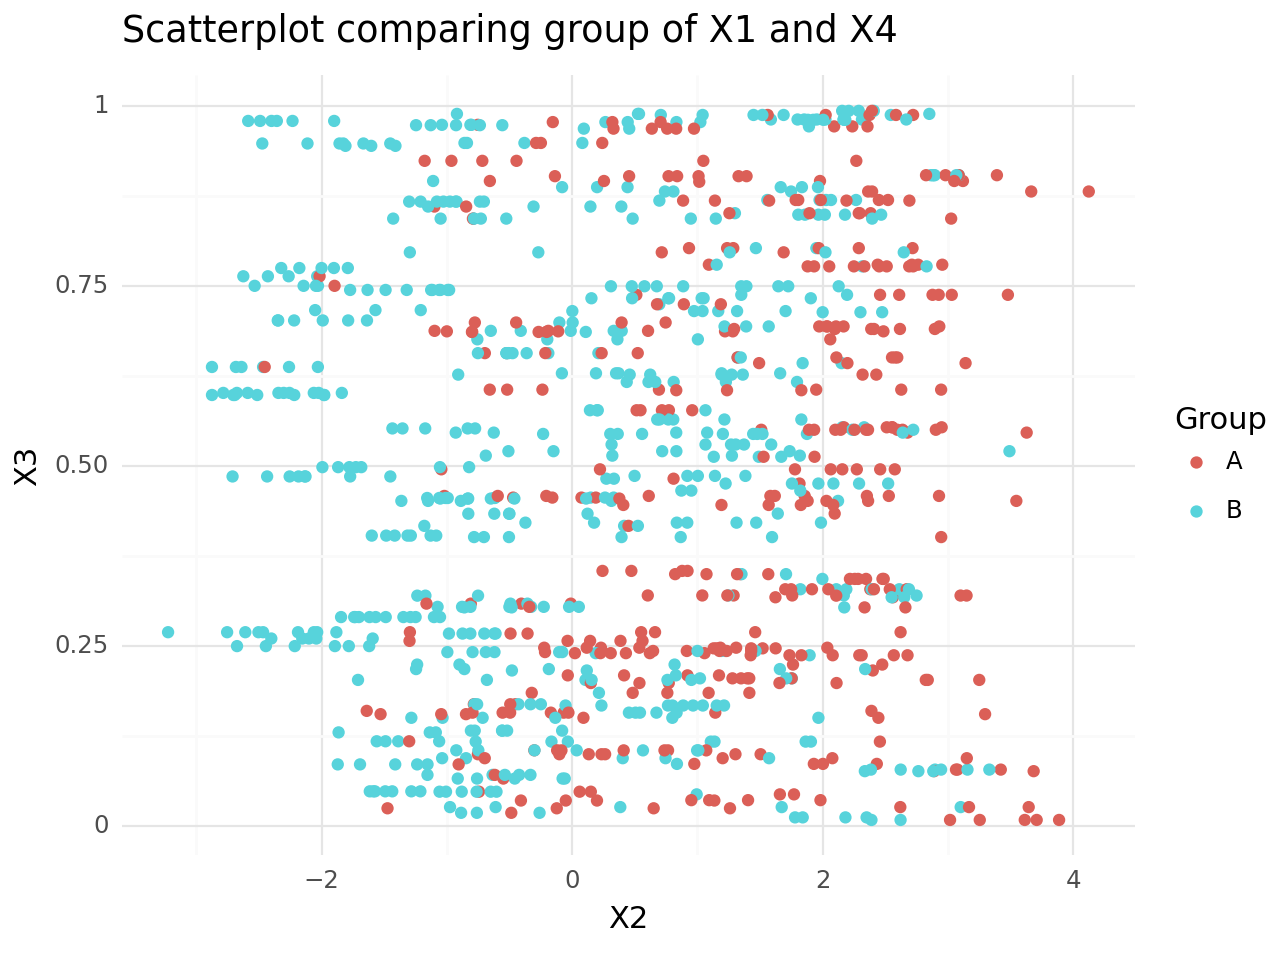

<Figure Size: (640 x 480)>

In [67]:
ggplot(data, aes(x = 'X2', y = 'X3', color = 'Group'))+geom_point()+theme_minimal()+ggtitle("Scatterplot comparing group of X1 and X4")

In [38]:
# organize and split data
predictors=[c for c in data.columns if c != "Group"]
X=data[predictors]
y=data['Group']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [39]:
# build parts of pipeline
z=make_column_transformer((StandardScaler(),predictors),remainder='passthrough')
# build pipeline
svm=SVC(probability=True)
pipe=Pipeline([('pre',z),('model',svm)])
# parameters dict
params={'model__C':[0.001, 0.01, 1, 5, 25, 50],'model__gamma':[0.001,0.01, 0.1, 0.5, 1,2,5],'model__kernel':["linear",'rbf']}
# grid search
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=5,refit=True)
# fit and check
grid.fit(X_train,y_train)
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('pre', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                     'X8'])])),
  ('model', SVC(C=50, gamma=0.01, probability=True))],
 'verbose': False,
 'pre': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                   'X8'])]),
 'model': SVC(C=50, gamma=0.01, probability=True),
 'pre__n_jobs': None,
 'pre__remainder': 'passthrough',
 'pre__sparse_threshold': 0.3,
 'pre__transformer_weights': None,
 'pre__transformers': [('standardscaler',
   StandardScaler(),
   ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])],
 'pre__verbose': False,
 'pre__verbose_feature_names_out': True,
 'pre__standardscaler': StandardScaler(),
 'pre__

In [50]:
#Results of gridsearch
svm=SVC(C=50,gamma=.01,probability=True,kernel='rbf')
pipe=Pipeline([('pre',z),('model',svm)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['X1', 'X2', 'X3', 'X4', 'X5',
                                                   'X6', 'X7', 'X8'])])),
                ('model', SVC(C=50, gamma=0.01, probability=True))])

In [51]:
print("Train Acc: ", accuracy_score(y_train, pipe.predict(X_train)))
print("Test Acc: ", accuracy_score(y_test, pipe.predict(X_test)))

print("Train ROC/AUC: ", roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print("Test ROC/AUC: ", roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1]))

Train Acc:  0.7825
Test Acc:  0.76
Train ROC/AUC:  0.865370427894696
Test ROC/AUC:  0.8422429124385395


In [56]:
#Logsistic regression
logistic=LogisticRegression()
pipe=Pipeline([('pre',z),('model',logistic)])
pipe.fit(X_train,y_train)
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

# assess
print("Train Acc: ", accuracy_score(y_train, y_pred_train))
print("Test Acc: ", accuracy_score(y_test, y_pred_test))
print("Train ROC AUC: ", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC AUC: ", roc_auc_score(y_test, y_pred_test_prob))

Train Acc:  0.77125
Test Acc:  0.75
Train ROC AUC:  0.8464251507856384
Test ROC AUC:  0.8457997698504028


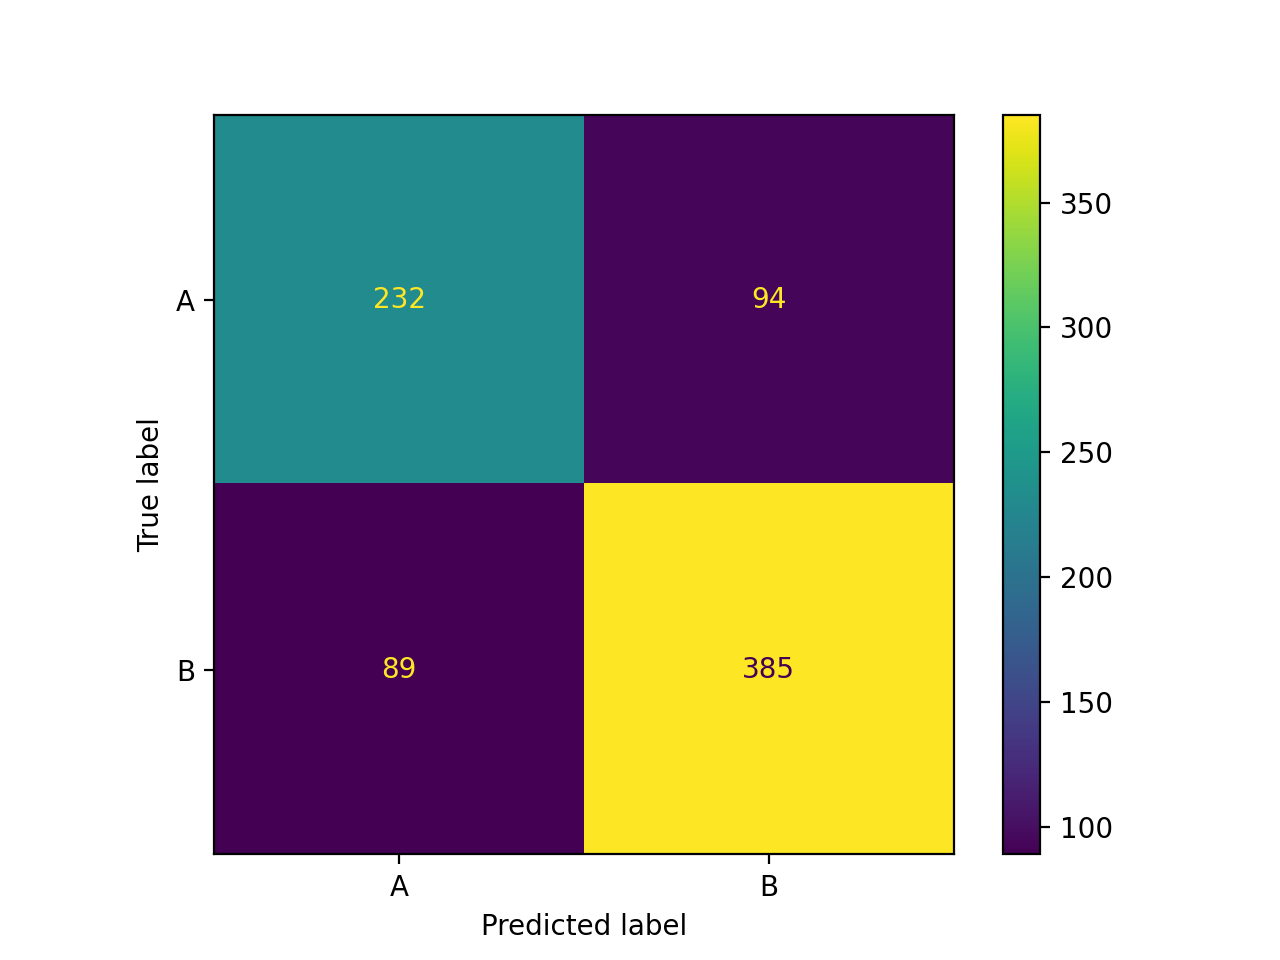

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train)

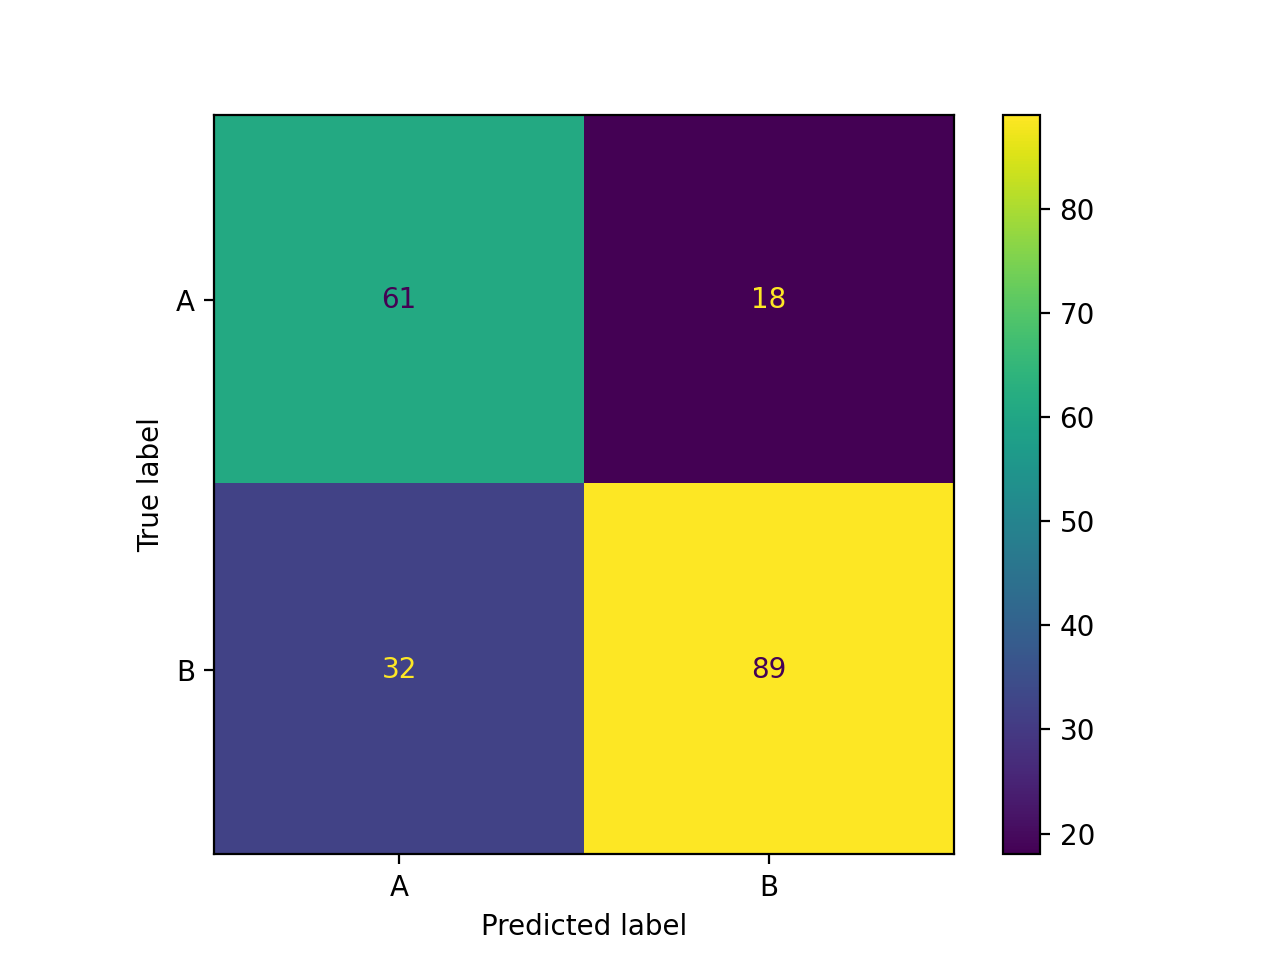

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

In [57]:
# build pipeline
knn=KNeighborsClassifier()
#Results of gridsearch

pipe=Pipeline([('pre',z),('model',knn)])
# parameters dict
params={'model__n_neighbors': range(2, 30)}
# grid search
grid=GridSearchCV(pipe,params,scoring='accuracy',cv=5,refit=True)
# fit and check
grid.fit(X_train,y_train)
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('pre', ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler', StandardScaler(),
                                    ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                     'X8'])])),
  ('model', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'pre': ColumnTransformer(remainder='passthrough',
                   transformers=[('standardscaler', StandardScaler(),
                                  ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
                                   'X8'])]),
 'model': KNeighborsClassifier(n_neighbors=18),
 'pre__n_jobs': None,
 'pre__remainder': 'passthrough',
 'pre__sparse_threshold': 0.3,
 'pre__transformer_weights': None,
 'pre__transformers': [('standardscaler',
   StandardScaler(),
   ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'])],
 'pre__verbose': False,
 'pre__verbose_feature_names_out': True,
 'pre__standardscaler': StandardScaler(),
 'pre__standa

In [58]:
knn=KNeighborsClassifier(n_neighbors=18)
pipe=Pipeline([('pre',z),('model',knn)])
pipe.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['X1', 'X2', 'X3', 'X4', 'X5',
                                                   'X6', 'X7', 'X8'])])),
                ('model', KNeighborsClassifier(n_neighbors=18))])

In [59]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

y_pred_train_prob = pipe.predict_proba(X_train)[:,1]
y_pred_test_prob = pipe.predict_proba(X_test)[:,1]

# assess
print("Train Acc: ", accuracy_score(y_train, y_pred_train))
print("Test Acc: ", accuracy_score(y_test, y_pred_test))
print("Train ROC AUC: ", roc_auc_score(y_train, y_pred_train_prob))
print("Test ROC AUC: ", roc_auc_score(y_test, y_pred_test_prob))

Train Acc:  0.76625
Test Acc:  0.715
Train ROC AUC:  0.8577340736714036
Test ROC AUC:  0.8140495867768595


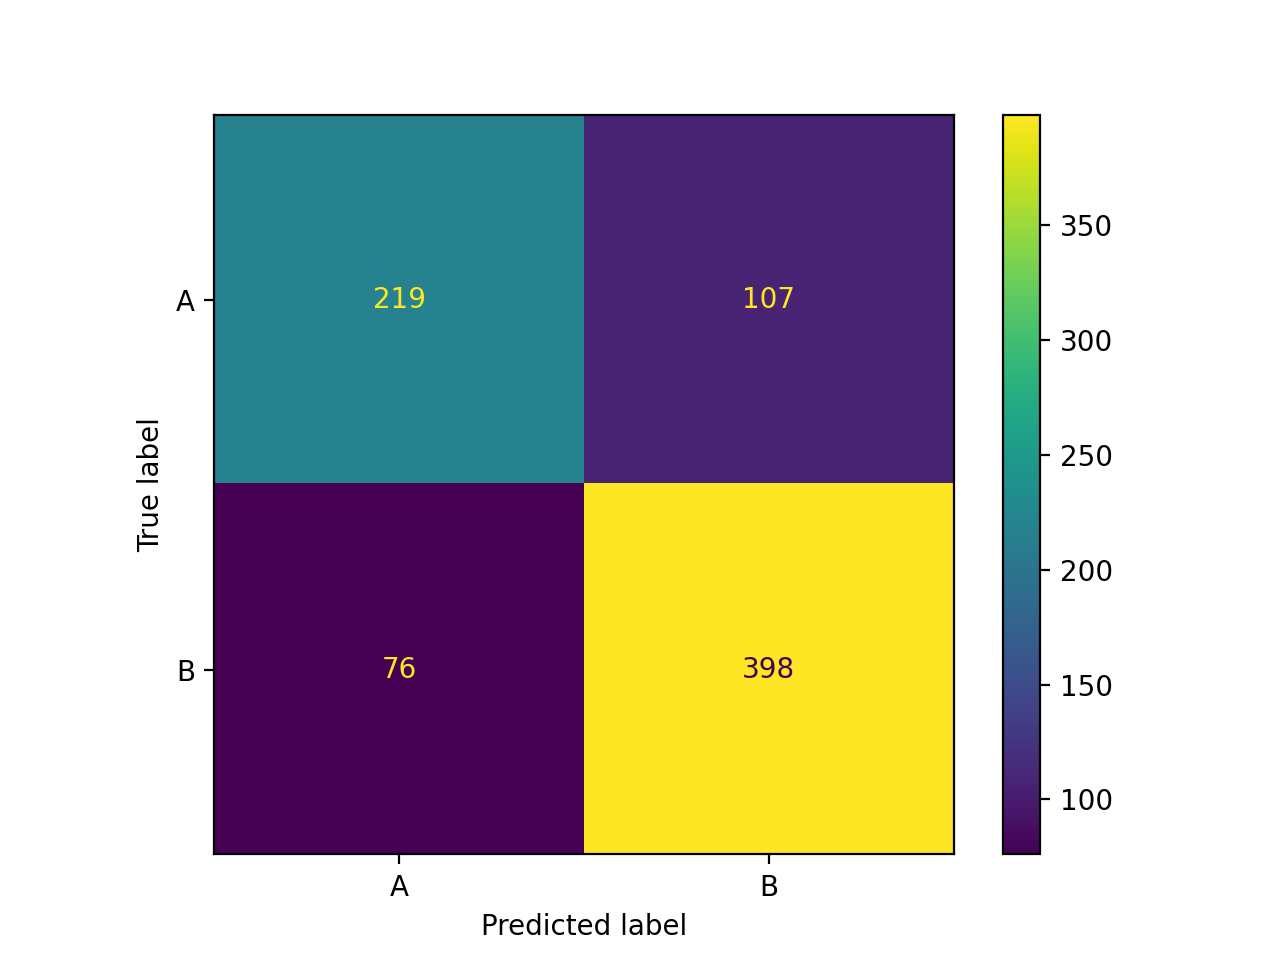

In [48]:
ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train)

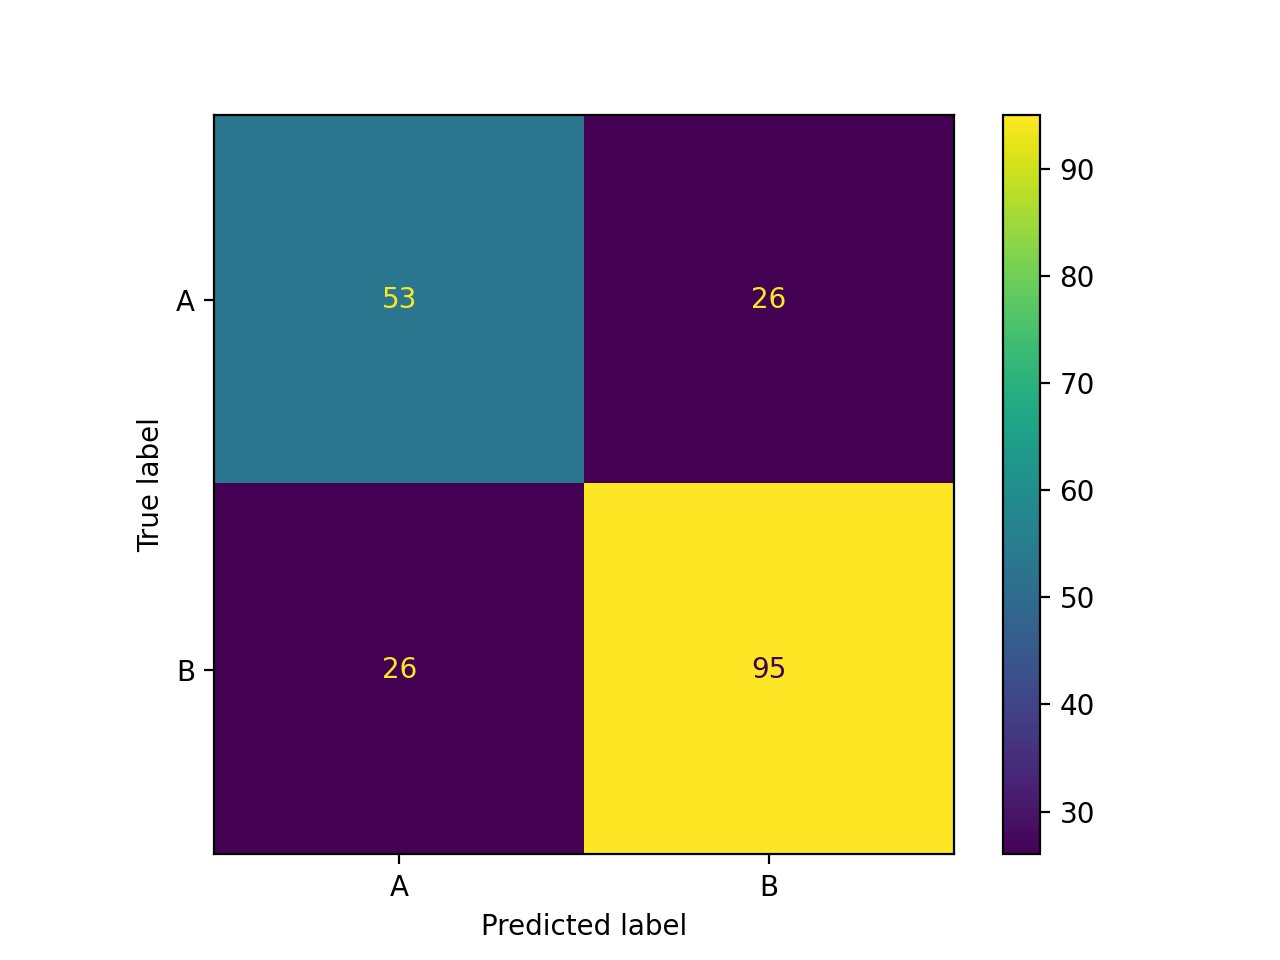

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)